<a href="https://colab.research.google.com/github/shreespace/Strategy-Storm-2025/blob/main/Round2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/strategy/Strategy Storm 2025 - Round 2 dataset - SSDataset.csv


In [ ]:
df = pd.read_csv('/kaggle/input/strategy/Strategy Storm 2025 - Round 2 dataset - SSDataset.csv')

In [ ]:
df.head()

,UserID,CustomerAge,Sex,Tenure,ServiceUsageRate,SupportCalls,BillingDelay,PlanType,AgreementDuration,TotalExpenditure,RecentActivity,Churn
0,1,55,Male,20,24,4,6,Standard,Monthly,635,25,0
1,2,28,Male,27,30,4,5,Premium,Quarterly,631,10,0
2,3,65,Female,60,17,7,16,Premium,Quarterly,314,1,1
3,4,53,Male,47,16,8,7,Premium,Annual,527,13,0
4,5,32,Male,56,5,7,15,Premium,Annual,236,25,0


In [ ]:
df.isna().sum()

UserID               0
CustomerAge          0
Sex                  0
Tenure               0
ServiceUsageRate     0
SupportCalls         0
BillingDelay         0
PlanType             0
AgreementDuration    0
TotalExpenditure     0
RecentActivity       0
Churn                0
dtype: int64

In [ ]:
df.describe

<bound method NDFrame.describe of        UserID  CustomerAge     Sex  Tenure  ServiceUsageRate  SupportCalls  \
0           1           55    Male      20                24             4   
1           2           28    Male      27                30             4   
2           3           65  Female      60                17             7   
3           4           53    Male      47                16             8   
4           5           32    Male      56                 5             7   
...       ...          ...     ...     ...               ...           ...   
16088   16089           37    Male      18                15             0   
16089   16090           22  Female       6                23             6   
16090   16091           31    Male      32                 8             1   
16091   16092           19    Male      51                20            10   
16092   16093           40    Male      60                 9             2   

       BillingDelay  PlanType

In [ ]:
# Basic Info
print("Dataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nSummary Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16093 entries, 0 to 16092
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             16093 non-null  int64 
 1   CustomerAge        16093 non-null  int64 
 2   Sex                16093 non-null  object
 3   Tenure             16093 non-null  int64 
 4   ServiceUsageRate   16093 non-null  int64 
 5   SupportCalls       16093 non-null  int64 
 6   BillingDelay       16093 non-null  int64 
 7   PlanType           16093 non-null  object
 8   AgreementDuration  16093 non-null  object
 9   TotalExpenditure   16093 non-null  int64 
 10  RecentActivity     16093 non-null  int64 
 11  Churn              16093 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 1.5+ MB
None

Missing Values:
UserID               0
CustomerAge          0
Sex                  0
Tenure               0
ServiceUsageRate     0
SupportCalls         0
BillingDe

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


Churn Distribution:
 Churn
0    8473
1    7620
Name: count, dtype: int64


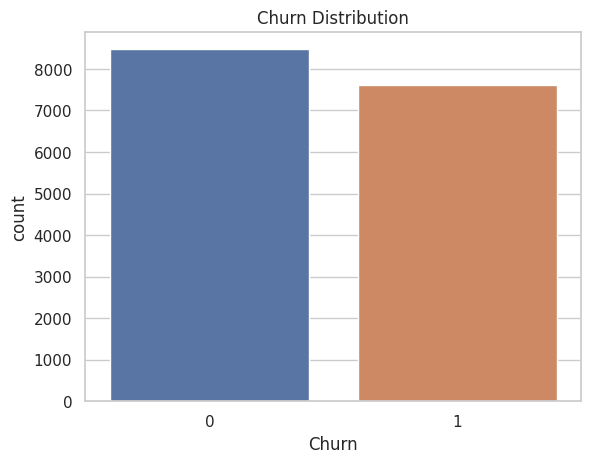

In [ ]:
# Class Imbalance
print("\nChurn Distribution:\n", df['Churn'].value_counts())
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

The data appears to have a relatively balanced distribution, with a slightly higher number of retained customers compared to churned ones.

# Customer Segmentation Insights

In [ ]:
Pie Chart:

Shows the percentage distribution of customer segments (Loyal, Churned, At-Risk, Occasional).


Stacked Bar Chart:

Displays the count of each segment broken down by gender (Sex).

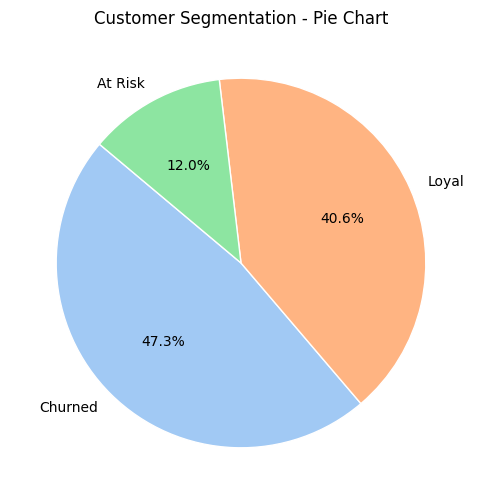

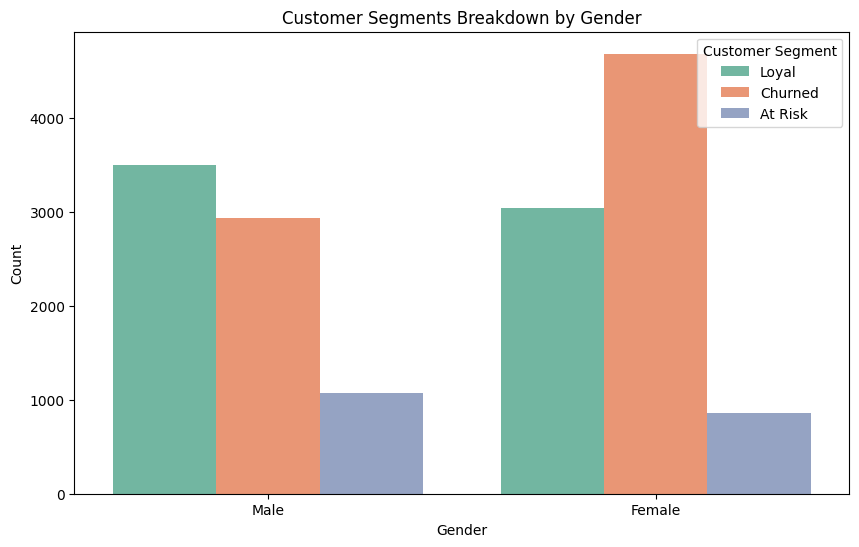

In [ ]:

# Define segmentation rules
def segment_customer(row):
    if row['Churn'] == 1:
        return 'Churned'
    elif row['Tenure'] > 12 and row['ServiceUsageRate'] > 0.8:
        return 'Loyal'
    elif row['Tenure'] <= 12 and row['ServiceUsageRate'] > 0.5:
        return 'At Risk'
    else:
        return 'Occasional'

# Create a new column for customer segments
df['CustomerSegment'] = df.apply(segment_customer, axis=1)

# 1. Pie Chart/Donut Chart for Customer Segments
segment_counts = df['CustomerSegment'].value_counts()
colors = sns.color_palette('pastel')[0:4]

plt.figure(figsize=(8, 6))
plt.pie(segment_counts, labels=segment_counts.index, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title('Customer Segmentation - Pie Chart')
plt.show()

# 2. Stacked Bar Chart for Segments by Demographics
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sex', hue='CustomerSegment', palette='Set2')
plt.title('Customer Segments Breakdown by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Customer Segment', loc='upper right')
plt.show()

## Pie Chart: Customer Segmentation
- Churned (47.3%):

    - Almost half of the customers fall under the "churned" category, indicating they have discontinued their association.
    - This could be a major area of concern that needs strategies like retention campaigns or loyalty rewards to reduce churn.

- Loyal (40.6%):

    - A significant portion of customers are loyal, suggesting that a good percentage of the base is engaged and satisfied.
    - Focus can be placed on maintaining their loyalty through rewards, offers, or personalized engagement.

- At Risk (12%):

    - A smaller but crucial portion of customers are at risk of churning.
    - Preventive measures like special discounts, personalized outreach, or surveys to understand their concerns may help.

# Bar Chart: Gender-Based Breakdown
- Male Customers:

    - More male customers are loyal compared to churned.
    - A smaller proportion of males are "at risk," but monitoring and targeting this group could be beneficial.

- Female Customers:

    - A higher number of female customers fall under the "churned" category than the loyal category.
    - This indicates a need for improved strategies to retain female customers, possibly through tailored marketing or addressing specific grievances.

- Overall Observations:

    - Both genders show a notable churn rate, but females appear to churn more compared to males.
    - A balanced approach to improve satisfaction and reduce churn across both genders is essential.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


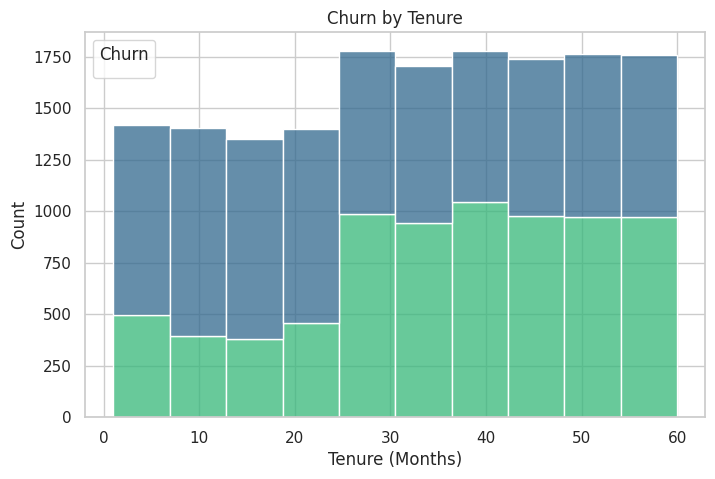

In [ ]:
# General Settings for Seaborn
sns.set(style="whitegrid")

#  Churn by Tenure
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Tenure', hue='Churn', multiple='stack', bins=10, palette='viridis')
plt.title('Churn by Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()


Customers with shorter tenure (0-12 months) seem to have a higher probability of churning.


The plot suggests that customers with longer tenure tend to have higher loyalty, likely due to higher engagement or better experiences over time.

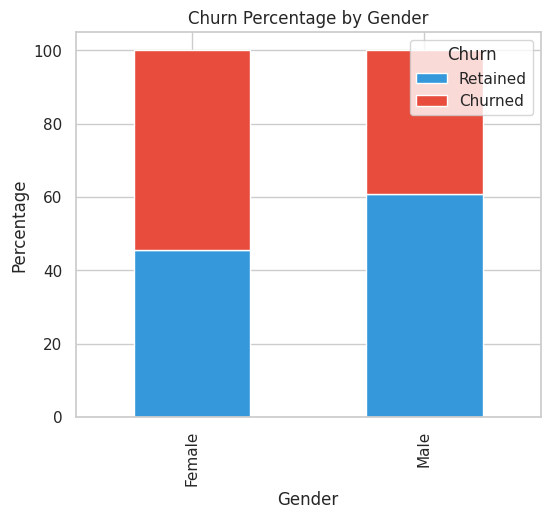

In [ ]:
#  Churn Percentage by Gender
gender_churn = df.groupby('Sex')['Churn'].value_counts(normalize=True).unstack() * 100
gender_churn.plot(kind='bar', stacked=True, figsize=(6, 5), color=['#3498db', '#e74c3c'])
plt.title('Churn Percentage by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Churn', labels=['Retained', 'Churned'])
plt.show()

- **Female Churn:** A higher percentage of females are churning compared to males, indicating a need for focused retention strategies for female customers.
- **Male Retention:** Males have a relatively better retention rate, but churn is still significant and requires attention.
- **Priority:** Address gender-specific churn dynamics by understanding pain points and tailoring solutions for better engagement and satisfaction.

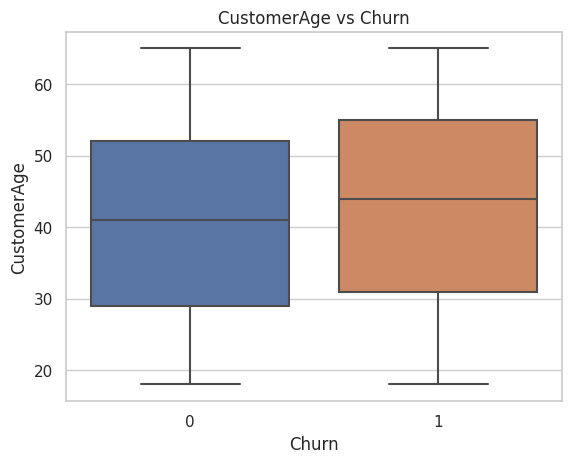

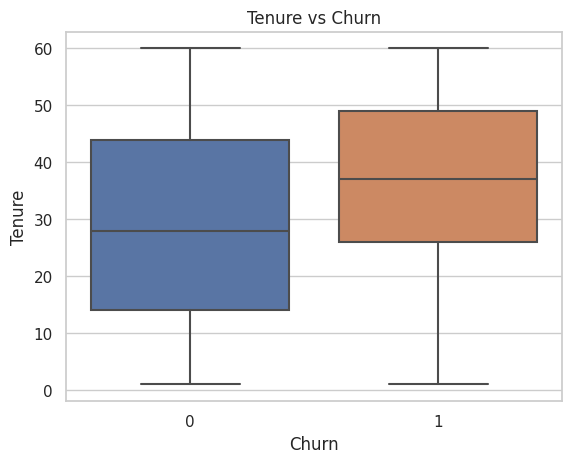

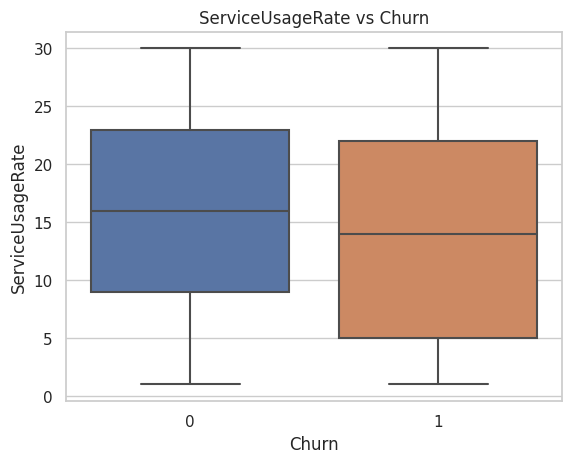

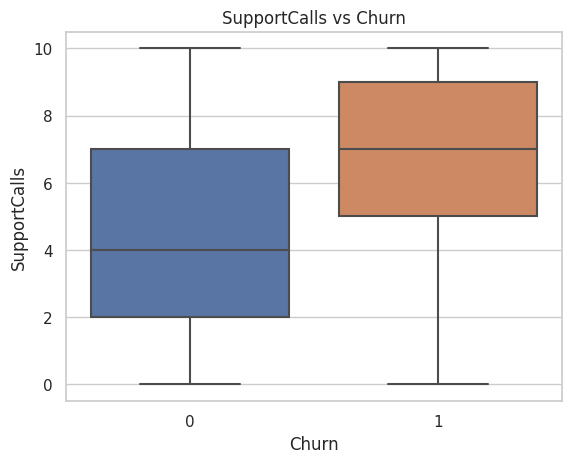

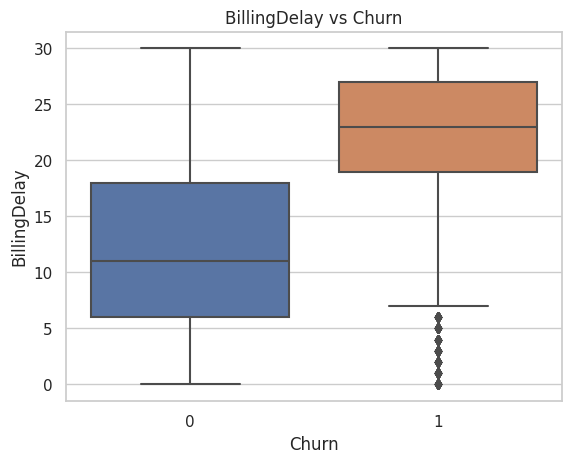

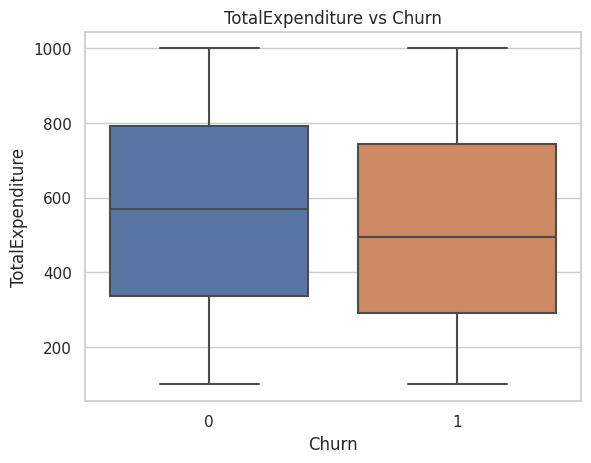

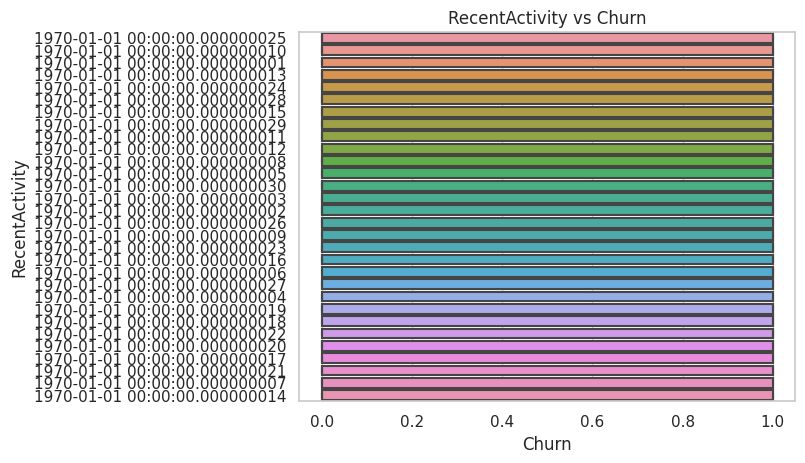

In [ ]:
# 4. Bivariate Analysis
# Numerical Features vs Churn
for feature in numerical_features:
    sns.boxplot(data=df, x='Churn', y=feature)
    plt.title(f'{feature} vs Churn')
    plt.show()

**Customer Age vs Churn:** No significant difference in age distribution between churned and retained customers. Age might not be a strong churn predictor.

**Tenure vs Churn:** Retained customers (0) have higher tenure compared to churned ones (1). Lower tenure could indicate higher churn risk.

**Service Usage Rate vs Churn:** Usage rate distributions are similar, but churned customers have slightly lower medians, hinting at reduced engagement.

**Support Calls vs Churn:** Churned customers make more support calls, suggesting dissatisfaction or issues with the service.

**Billing Delay vs Churn:** Churned customers experience higher billing delays, indicating billing inefficiencies might drive churn.

**Total Expenditure vs Churn:** Expenditure patterns are comparable, implying spending habits may not strongly influence churn.

**Recent Activity vs Churn:** The visual lacks clear insights due to representation but could reflect similar activity across both groups.

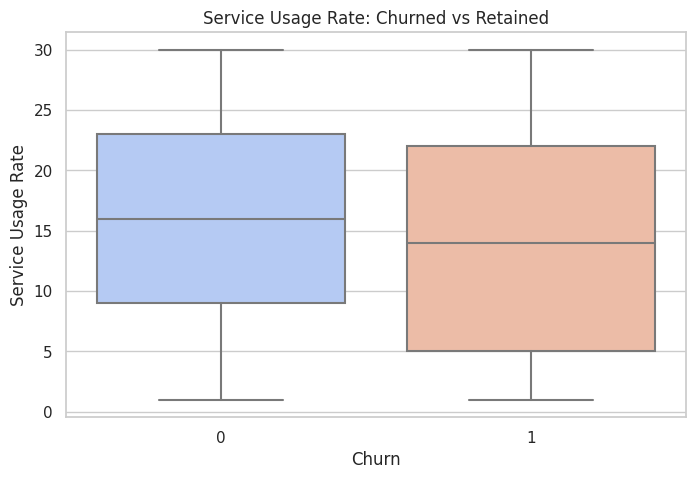

In [ ]:
# 3. Service Usage Rate for Churned vs Retained
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn', y='ServiceUsageRate', palette='coolwarm')
plt.title('Service Usage Rate: Churned vs Retained')
plt.xlabel('Churn')
plt.ylabel('Service Usage Rate')
plt.show()

The boxplot shows that retained customers (0) have a slightly higher median service usage rate than churned customers (1). Both groups have a similar spread, but lower usage rates are more common among churned customers, suggesting a possible link between higher usage and retention.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


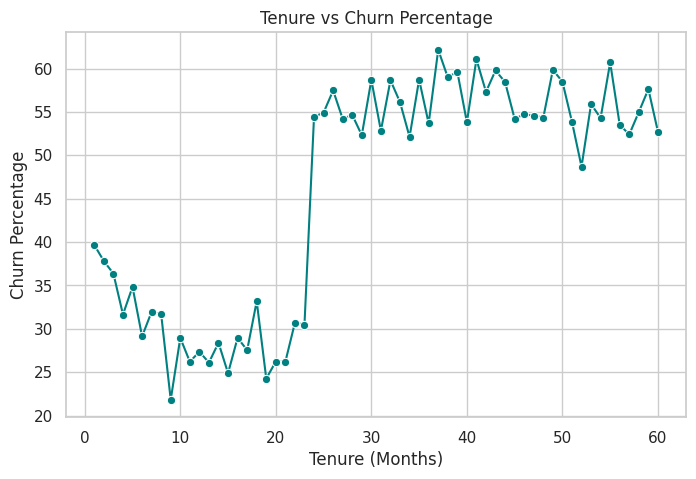

In [ ]:

# 4. Tenure vs Churn Percentage
tenure_churn = df.groupby('Tenure')['Churn'].mean() * 100
plt.figure(figsize=(8, 5))
sns.lineplot(data=tenure_churn, marker='o', color='teal')
plt.title('Tenure vs Churn Percentage')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Percentage')
plt.show()

The chart shows that churn percentage decreases for customers with tenure below 20 months but sharply increases after this period, stabilizing at a higher level (around 55-60%) for tenures beyond 25 months. This suggests that customers are more likely to churn after crossing a certain tenure threshold, possibly due to dissatisfaction or unmet expectations over time.

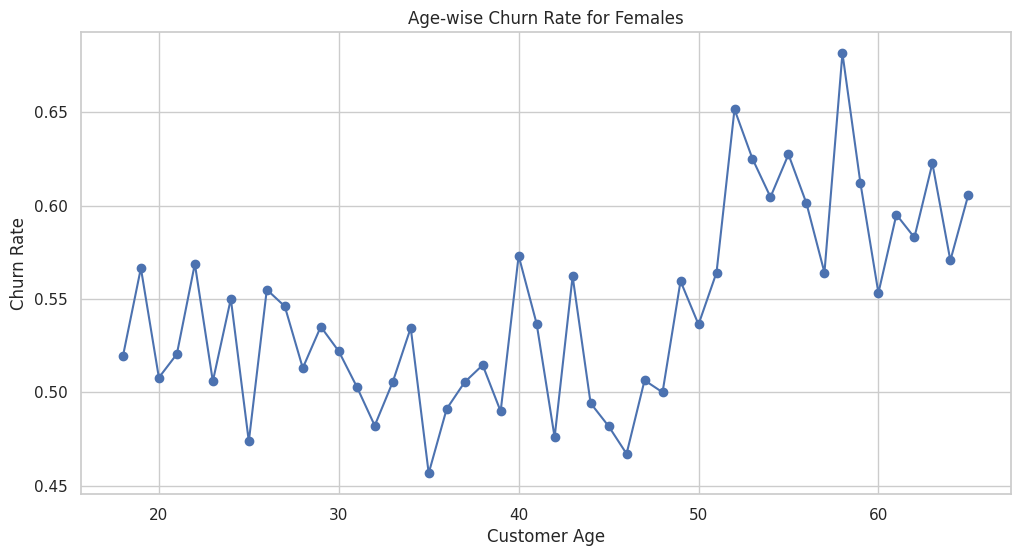

In [ ]:
# Filter dataset for females
female_data = df[df['Sex'] == 'Female']

# Group by CustomerAge and calculate churn rate
age_wise_churn = female_data.groupby('CustomerAge')['Churn'].mean()

# Plot the churn rate
plt.figure(figsize=(12, 6))
age_wise_churn.plot(kind='line', marker='o')
plt.title('Age-wise Churn Rate for Females')
plt.xlabel('Customer Age')
plt.ylabel('Churn Rate')
plt.grid(True)
plt.show()


The graph shows the churn rate of female customers across different age groups. Key observations include:
1. Younger Age (20-30 years): Churn rate fluctuates but remains relatively stable, averaging around 0.5 to 0.55.
2. Middle Age (30-40 years): A downward trend is observed, with churn rates dipping below 0.5 in some cases.
3. Older Age (40-60+ years): Churn rate increases significantly, peaking above 0.65 in the 50-60 range.

This indicates older female customers are more likely to churn compared to younger ones.

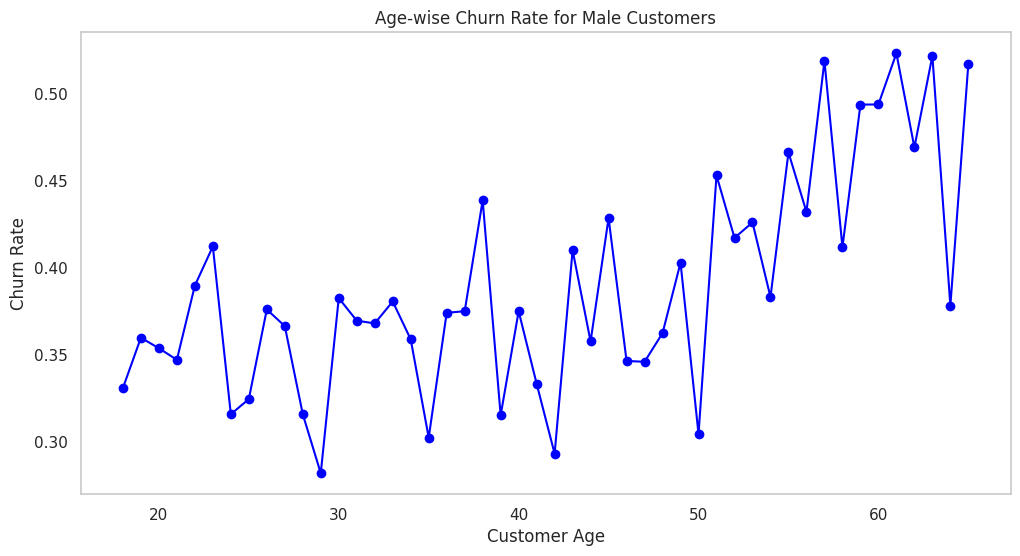

In [ ]:
# Filter data for males
male_data = df[df['Sex'] == 'Male']

# Group by age and calculate churn rate
age_wise_churn_male = male_data.groupby('CustomerAge')['Churn'].mean()

# Plot the churn rate
plt.figure(figsize=(12, 6))
age_wise_churn_male.plot(kind='line', marker='o', color='blue')
plt.title('Age-wise Churn Rate for Male Customers')
plt.xlabel('Customer Age')
plt.ylabel('Churn Rate')
plt.grid()
plt.show()

The graph shows the churn rate of male customers across different age groups. Key observations include:

1. Younger Age (20-30 years): Churn rates are relatively low and fluctuate around 0.3 to 0.4.
2. Middle Age (30-40 years): Churn rates remain stable, with no significant increase.
3. Older Age (40-60+ years): A clear upward trend is observed, with churn rates exceeding 0.5 in older age groups.

This indicates churn rates for male customers steadily increase with age, with older males being more likely to churn.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


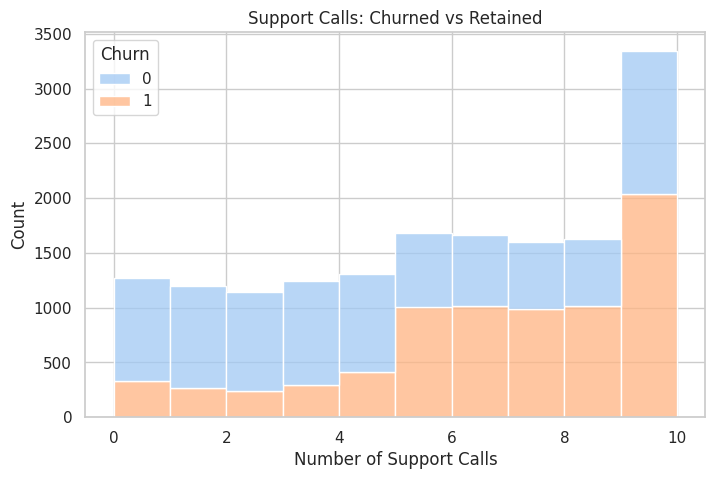

In [ ]:
# 5. Support Calls for Churned vs Retained
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='SupportCalls', hue='Churn', multiple='stack', bins=10, palette='pastel')
plt.title('Support Calls: Churned vs Retained')
plt.xlabel('Number of Support Calls')
plt.ylabel('Count')
plt.show()

The graph illustrates the relationship between the number of support calls and customer churn:

1. Low Support Calls (0-4): Most customers are retained (blue bars), with a small proportion churning (orange bars).
2. Moderate Support Calls (5-7): The churn rate increases as the orange section becomes more significant compared to the blue.
3. High Support Calls (8-10): Churn dominates, with a much larger proportion of churning customers compared to retained ones.

Inference: Higher numbers of support calls are strongly associated with customer churn, indicating that frequent support interactions might signal unresolved issues or dissatisfaction.

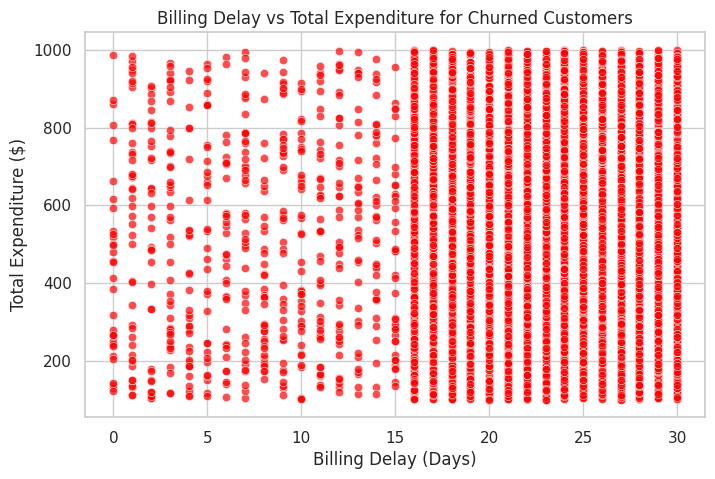

In [ ]:

# 6. Billing Delay vs Total Expenditure for Churned Customers
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df[df['Churn'] == 1], x='BillingDelay', y='TotalExpenditure', alpha=0.7, color='red')
plt.title('Billing Delay vs Total Expenditure for Churned Customers')
plt.xlabel('Billing Delay (Days)')
plt.ylabel('Total Expenditure ($)')
plt.show()

**Two Distinct Regions:**

1. From 0 to about 15 days of billing delay, there is a scattered distribution of data points across the entire range of expenditures (200–1000 dollars).
2. From 15 to 30 days, the distribution appears much denser, with nearly all values of expenditures being covered uniformly.

**Pattern in Delayed Billing:**

1.The dense vertical bands after 15 days suggest that for longer billing delays, churned customers exhibit uniform expenditure behavior. This could indicate that customers with billing delays exceeding 15 days are more likely to churn regardless of their expenditure level

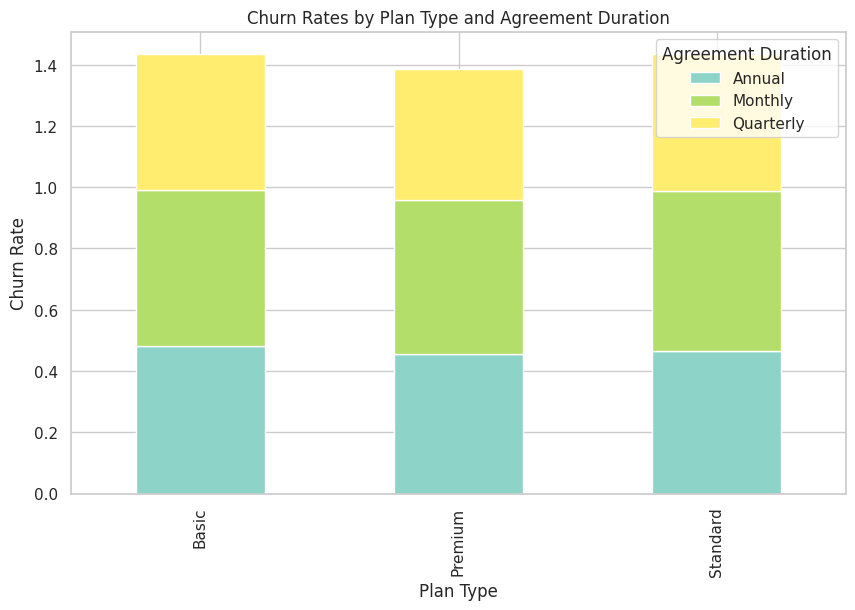

In [ ]:
# 7. Churn Rates by Plan Type and Agreement Duration
plan_agreement = df.groupby(['PlanType', 'AgreementDuration'])['Churn'].mean().unstack()
plan_agreement.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title('Churn Rates by Plan Type and Agreement Duration')
plt.xlabel('Plan Type')
plt.ylabel('Churn Rate')
plt.legend(title='Agreement Duration')
plt.show()

**Agreement Duration Impact:**

1. Annual plans have the lowest churn rate across all plan types, indicating higher customer retention for long-term agreements.

2. Monthly plans have moderate churn rates, while quarterly plans consistently have the highest churn rates.

**Plan Type Comparison:**

 -Churn rates are similar across all plan types, suggesting that agreement duration plays a bigger role in churn than the plan type itself.

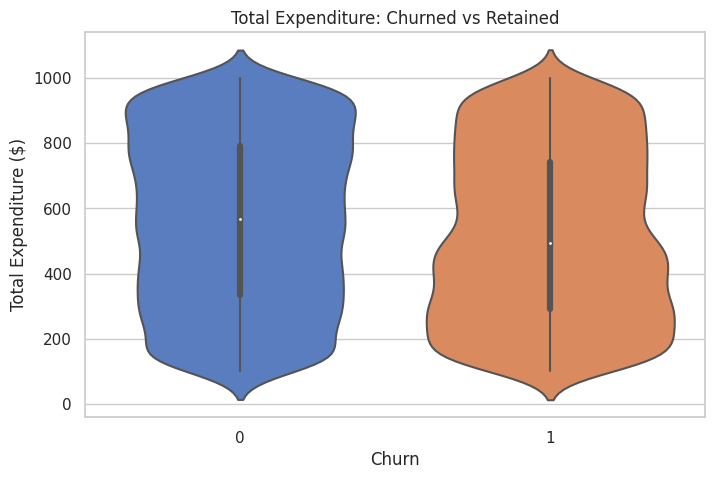

In [ ]:

# 8. Total Expenditure Distribution for Churned vs Retained Customers
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='Churn', y='TotalExpenditure', palette='muted')
plt.title('Total Expenditure: Churned vs Retained')
plt.xlabel('Churn')
plt.ylabel('Total Expenditure ($)')
plt.show()

This violin plot compares total expenditure ($) for churned (1) and retained (0) customers.

**Key Insights:**

1. Similar Distribution:

-The overall expenditure distribution is similar for both churned and retained groups, with most values concentrated between $200 and $800.
-Both groups have a similar median and spread.

2. Outliers:

There are slight variations at the extremes (lower and higher expenditures), but no significant differences are visible between churned and retained customers.

**Conclusion:**
Expenditure alone may not be a strong predictor of churn, as both groups show comparable spending patterns.

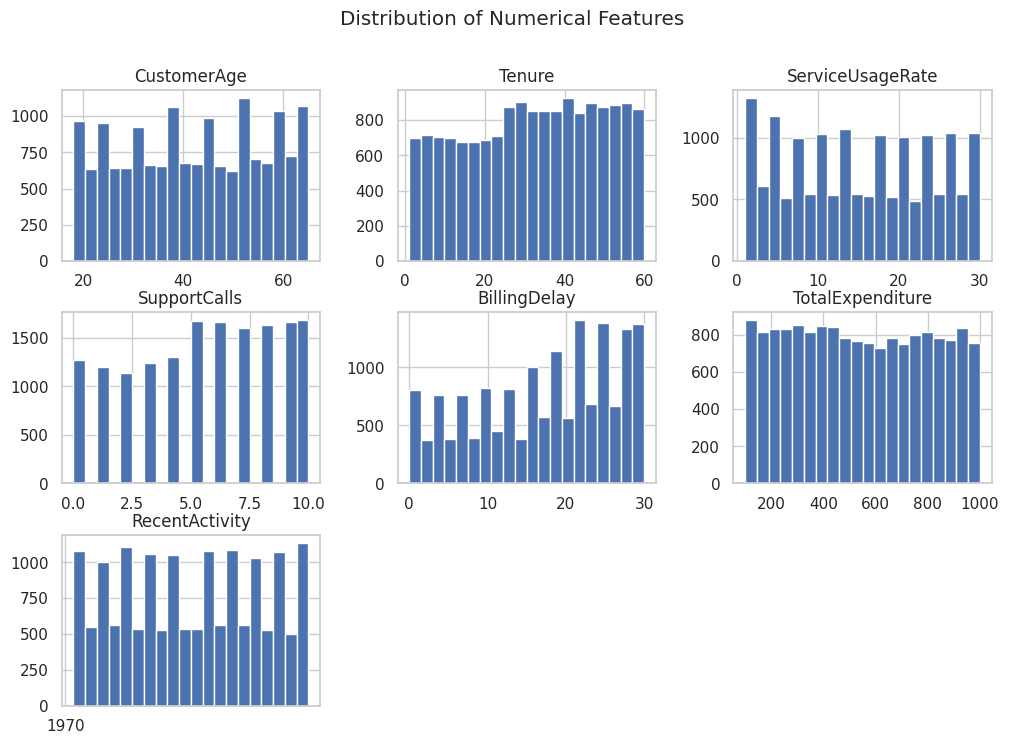

In [ ]:
# Numerical Features
numerical_features = ['CustomerAge', 'Tenure', 'ServiceUsageRate', 'SupportCalls',
                      'BillingDelay', 'TotalExpenditure', 'RecentActivity']
df[numerical_features].hist(figsize=(12, 8), bins=20)
plt.suptitle('Distribution of Numerical Features')
plt.show()

The histogram plots display the distribution of numerical features. Here's a brief inference:

1. CustomerAge: Fairly uniform distribution with peaks around the 20-40 and 50-60 ranges.
2. Tenure: Higher frequency in the 30-60 range, indicating longer customer retention.
3. ServiceUsageRate: Varied distribution with slightly lower usage at the extremes.
4. BillingDelay: More customers experience delays of around 15-30 units.
5. SupportCalls: High frequency of customers making 5-10 calls, indicating frequent support interactions.
6. TotalExpenditure: Distribution is relatively uniform but tapers slightly towards higher expenditures.
7. RecentActivity: Consistent activity across time periods.

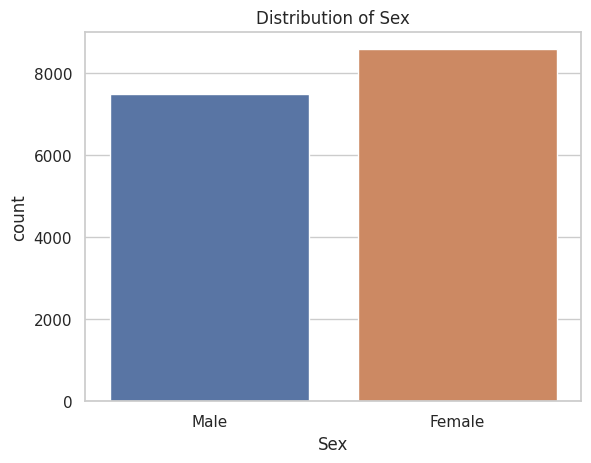

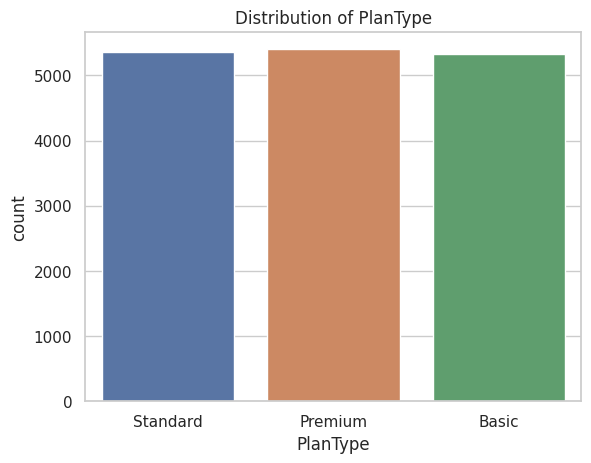

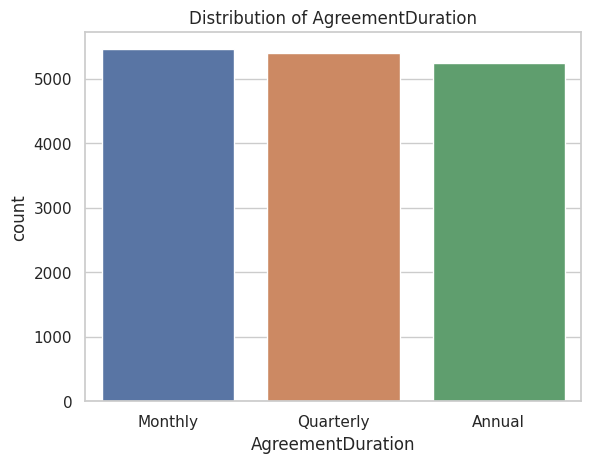

In [ ]:
# Categorical Features
categorical_features = ['Sex', 'PlanType', 'AgreementDuration']
for feature in categorical_features:
    sns.countplot(data=df, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.show()

**Sex:**

1. The count of female customers slightly exceeds that of male customers.
2. This could suggest a marginally higher inclination or retention of female customers within the dataset.

**PlanType:**

1. The Standard, Premium, and Basic plans have a near-equal distribution, indicating that no single plan dominates the customer base.
2. This balance might reflect diverse customer needs or well-distributed marketing and pricing strategies.

**AgreementDuration:**

1. The Monthly, Quarterly, and Annual agreement durations are evenly distributed, suggesting flexibility in contract offerings.
2. The lack of significant preference might imply that customers value different agreement options based on their specific circumstances (e.g., financial flexibility, service trial periods, or long-term commitments).

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


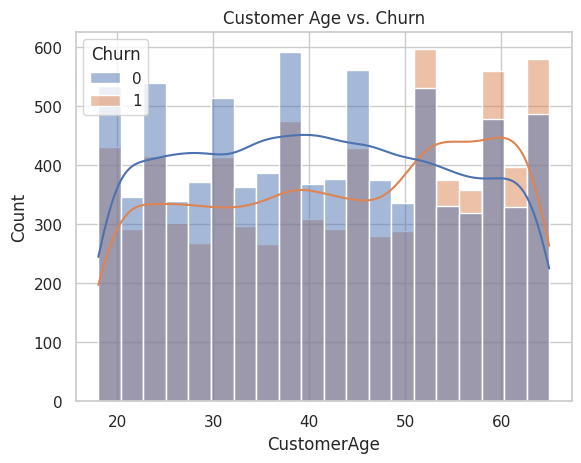

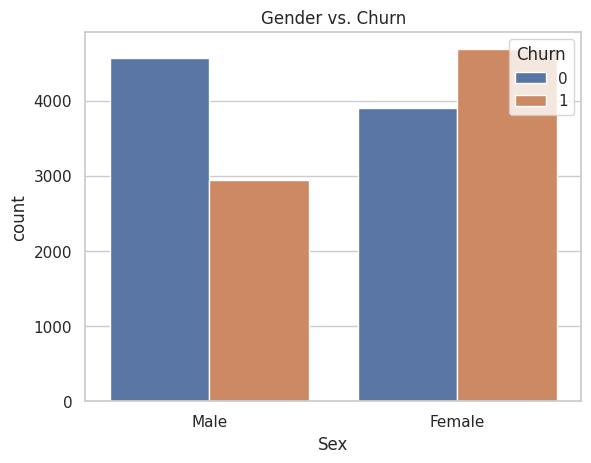

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


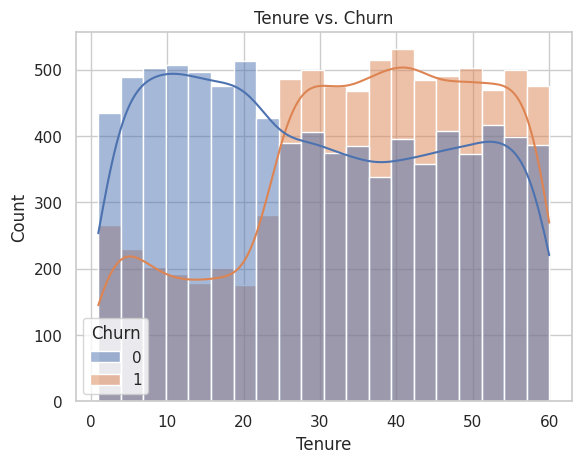

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


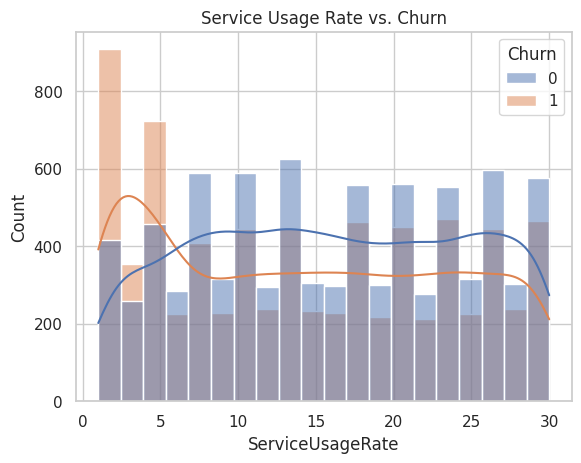

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


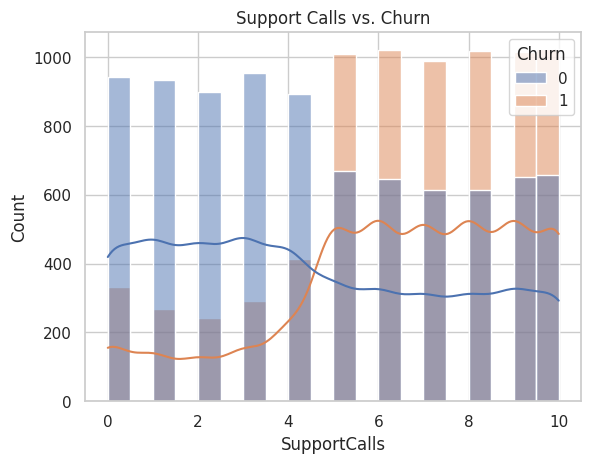

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


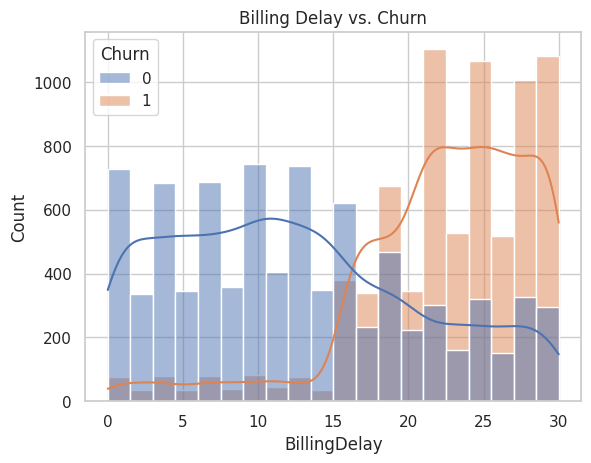

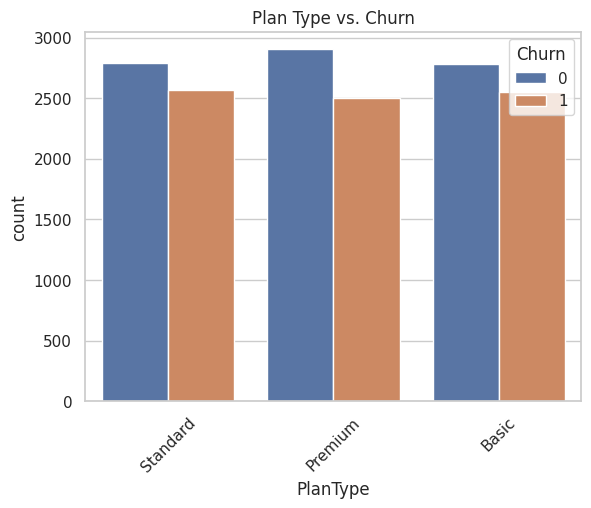

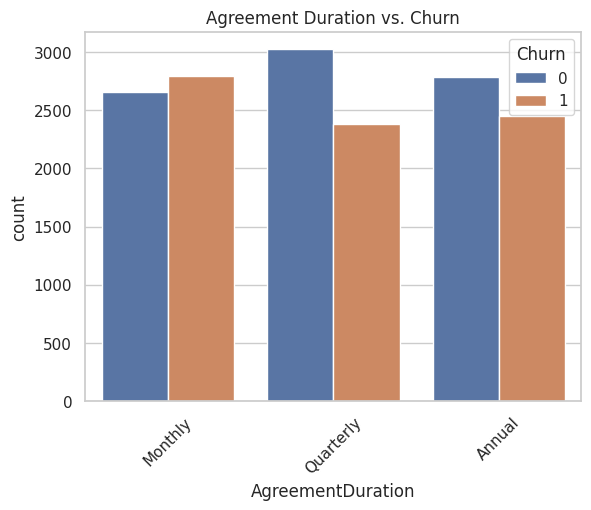

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


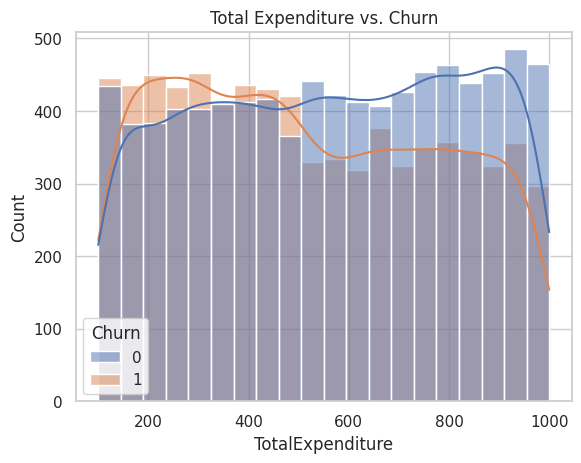

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


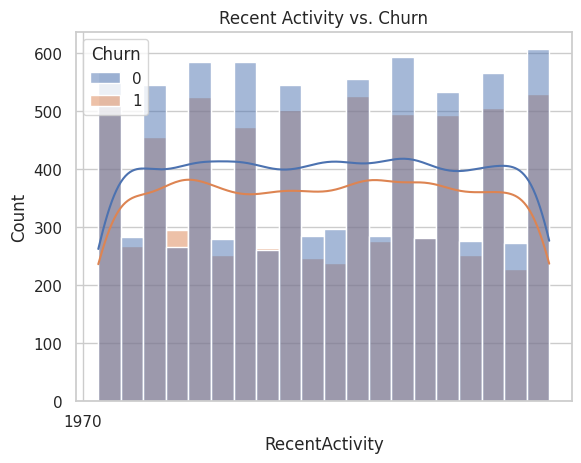

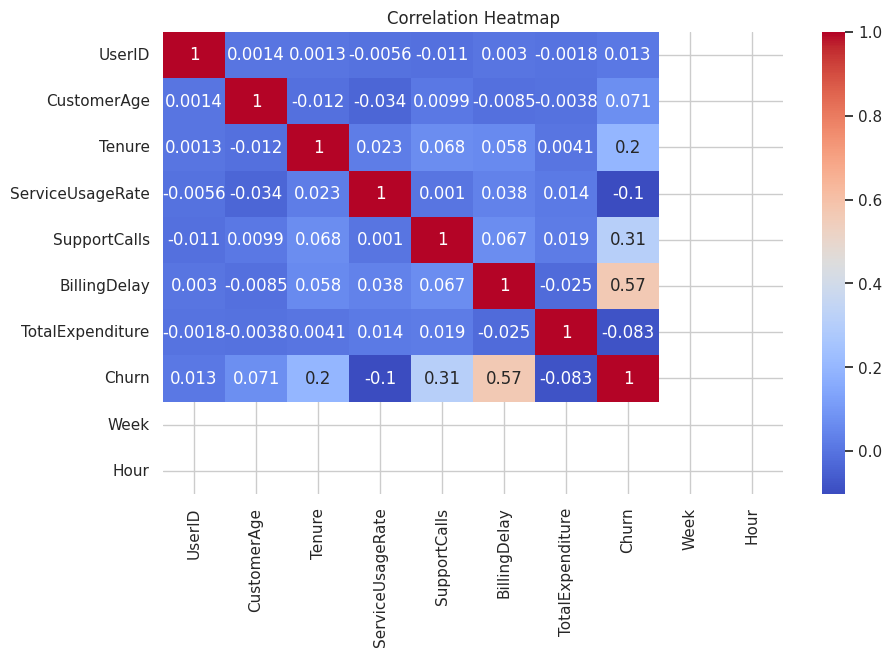

In [ ]:
# Age Analysis
sns.histplot(data=df, x='CustomerAge', hue='Churn', kde=True, bins=20)
plt.title("Customer Age vs. Churn")
plt.show()

# Gender Analysis
sns.countplot(data=df, x='Sex', hue='Churn')
plt.title("Gender vs. Churn")
plt.show()

# Tenure vs. Churn
sns.histplot(data=df, x='Tenure', hue='Churn', kde=True, bins=20)
plt.title("Tenure vs. Churn")
plt.show()

# Service Usage Rate
sns.histplot(data=df, x='ServiceUsageRate', hue='Churn', kde=True, bins=20)
plt.title("Service Usage Rate vs. Churn")
plt.show()

# Support Calls
sns.histplot(data=df, x='SupportCalls', hue='Churn', kde=True, bins=20)
plt.title("Support Calls vs. Churn")
plt.show()

# Billing Delay
sns.histplot(data=df, x='BillingDelay', hue='Churn', kde=True, bins=20)
plt.title("Billing Delay vs. Churn")
plt.show()

# Plan Type Analysis
sns.countplot(data=df, x='PlanType', hue='Churn')
plt.title("Plan Type vs. Churn")
plt.xticks(rotation=45)
plt.show()

# Agreement Duration
sns.countplot(data=df, x='AgreementDuration', hue='Churn')
plt.title("Agreement Duration vs. Churn")
plt.xticks(rotation=45)
plt.show()

# Total Expenditure
sns.histplot(data=df, x='TotalExpenditure', hue='Churn', kde=True, bins=20)
plt.title("Total Expenditure vs. Churn")
plt.show()

# Recent Activity
sns.histplot(data=df, x='RecentActivity', hue='Churn', kde=True, bins=20)
plt.title("Recent Activity vs. Churn")
plt.show()

# Correlation Heatmap
corr = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**Inference from the visualizations:**
1. Customer Age vs. Churn:
Churn is relatively consistent across age groups.
Slightly higher churn is observed in older customers (ages 50-60).
2. Gender vs. Churn:
Both male and female customers show similar churn patterns.
Slightly higher churn is observed among females.
3. Plan Type vs. Churn:
Churn rates are similar across Standard, Premium, and Basic plans, indicating no strong influence of Plan Type on churn.
4. Recent Activity vs. Churn:
No clear trend between recent activity levels and churn, but slightly higher churn is seen at lower activity levels.
5. Tenure vs. Churn:
Customers with shorter tenures (below 20 units) have a significantly higher churn rate.
Longer-tenured customers are less likely to churn, indicating better retention over time.
6. Service Usage Rate vs. Churn:
Churn is higher at lower usage rates.
Customers with moderate to high usage rates show lower churn.
7. Support Calls vs. Churn:
Churn increases with a higher number of support calls, especially beyond 5 calls.
This suggests that frequent support interactions might signal dissatisfaction.
8. Billing Delay vs. Churn:
Customers experiencing longer billing delays (above 15 units) have a higher churn rate.
Billing issues seem to correlate strongly with churn.
9. Total Expenditure vs. Churn:
Lower expenditures correlate with higher churn.
Customers with higher expenditures tend to have lower churn, suggesting higher engagement or satisfaction.
10. Agreement Duration vs. Churn:
Monthly agreements have slightly higher churn compared to Quarterly and Annual agreements.
Longer agreements may indicate greater customer commitment.

**Correlation Heatmap:**
-Churn shows the highest positive correlation with:
  1. BillingDelay (0.57): Billing issues are a strong predictor of churn.
  2. SupportCalls (0.31): Frequent support calls correlate with higher churn.
  3. Tenure (0.2): Shorter tenure is associated with higher churn.
-Negative correlation with ServiceUsageRate (-0.1) and TotalExpenditure (-0.083), suggesting these features reduce churn likelihood.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

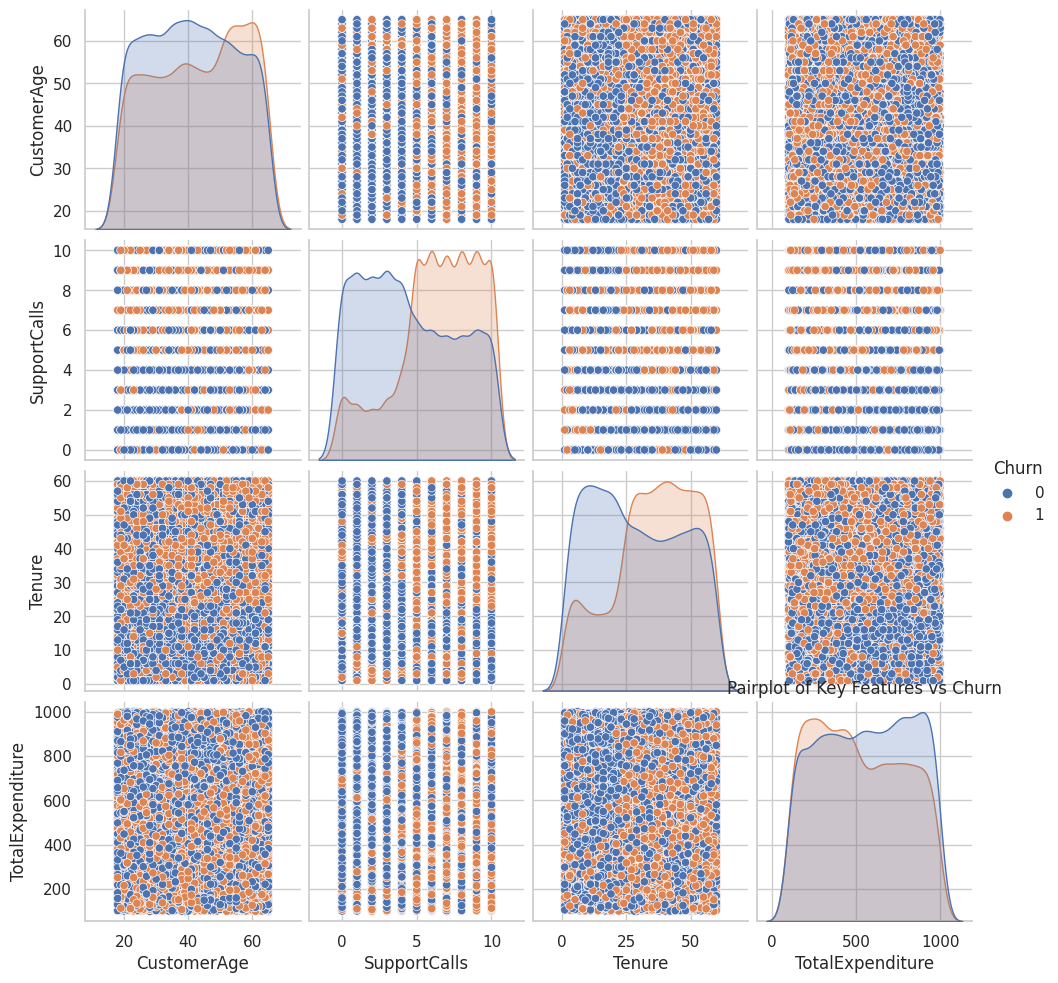

In [ ]:
# Multivariate Analysis: Pairplot of Age, Support Calls, Tenure, and Expenditure
sns.pairplot(df[['CustomerAge', 'SupportCalls', 'Tenure', 'TotalExpenditure', 'Churn']], hue='Churn')
plt.title("Pairplot of Key Features vs Churn")
plt.show()

**Inference from the Pairplot:**

1. CustomerAge vs. Churn:

     -Churn is relatively uniform across different age groups.
     -Slightly higher churn is observed among older customers (ages 50-60), but the trend is not very strong.
2. SupportCalls vs. Churn:

     -There is a strong positive relationship between the number of support calls and churn.
     -Customers making more than 5-6 support calls are more likely to churn, indicating dissatisfaction with customer service.
3. Tenure vs. Churn:

    -Customers with shorter tenure (less than 20) show a higher likelihood of churn.
    -Longer tenure (above 40) correlates with lower churn, suggesting that customer retention improves over time.
4. TotalExpenditure vs. Churn:

   -Higher total expenditure is associated with lower churn rates.
   -Customers with lower expenditures are more likely to churn, possibly due to lower engagement or dissatisfaction with services.
5. Cross-feature Interactions:

  -No clear patterns are observed in the interactions between CustomerAge, SupportCalls, Tenure, and TotalExpenditure that would strongly differentiate churners from non-churners.
  -However, SupportCalls and Tenure individually show distinct patterns that strongly correlate with churn.

**Key Insights:**
  -Support Calls and Tenure are critical indicators of churn.
  -Older customers and those with lower expenditures might require targeted retention strategies.
  -Improving customer support and providing incentives for longer service engagement could reduce churn significantly.